# Model Implementation

Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

Load The Data And Generate DataFrame

In [3]:
df=pd.read_csv('gpt_data.csv')

In [4]:
print(df)

                                                     text  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
419192  He wants to see prices brought down across the...   
419193  Costs: The Department for Environment, Food an...   
419194  Details of the action on water bills are expec...   
419195  Chancellor George Osborne signalled the govern...   
419196  But Mr Miliband appeared to steal a march on t...   

                                              paraphrases  category    source  
0       ['Can you provide a detailed procedure for inv...  question     quora  
1       ['Can you tell me about the history of the Koh...  question     quora  
2       ['What are some way




Creating A Dictionary With Texts And Their Corresponding Categories


In [5]:
category={}
for i in range(len(df)):
    chatgpt=df.iloc[i]["paraphrases"][1:-1].split(', ')
    for j in chatgpt[:1]:
        category[j[1:-1]]='chatgpt'
    category[df.iloc[i]['text']]="human"
    
category

{'Can you provide a detailed procedure for investing in the Indian stock market?': 'chatgpt',
 'What is the step by step guide to invest in share market in india?': 'human',
 'Can you tell me about the history of the Kohinoor (Koh-i-Noor) Diamond?': 'chatgpt',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?': 'human',
 'What are some ways to enhance my internet speed when utilizing a VPN?': 'chatgpt',
 'How can I increase the speed of my internet connection while using a VPN?': 'human',
 'What is causing my mental loneliness and how can I overcome it?': 'chatgpt',
 'Why am I mentally very lonely? How can I solve it?': 'human',
 'Among suga': 'chatgpt',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?': 'human',
 'What can be inferred about me based on my Capricorn Su': 'chatgpt',
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?': 'human',
 'Is purchasing a Tiago a good idea?': 'chatgpt',
 'Should I buy tiago?':

Converting Category Dictionary To DatFrame

In [6]:
df=pd.DataFrame(category.items(),columns=["text","category"])
df=df.sample(frac=1)
df=df[:20000]
df

,text,category
89724,In what way can I incorporate all of these wor...,chatgpt
780422,85 percent believe that their current famil,chatgpt
368333,In what ways can I maintain composure when ex...,human
195880,How do principle and philosophy differ from ea...,chatgpt
803991,The kidney that Dr. Richard Batista donated to...,chatgpt
...,...,...
802797,QPR fans always have one eye on the weather wi...,human
784194,Chelsea may loan Andrej Kramaric to Leicester ...,chatgpt
318832,Can you share some of your personal anecdotes ...,chatgpt
89230,What are the most interesting fields ML is bei...,human


In [7]:
df["category"].value_counts()

human      10341
chatgpt     9659
Name: category, dtype: int64

In [8]:
X=df['text']
y=df['category']

Splitting The Dataset Into Train And Test Datasets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Selecting Best Classifier

Performing Different Classifiers And Calculating Their Accuracy To Choose Best Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [42]:
def prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    f1_score= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    return acc_score,f1_score

In [46]:
acc_score = {}
f1_score={}
clfs= {
    'LR':lg,
    'SVM':sv,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
}
for name,clf in clfs.items():
    acc_score[name],f1_score[name]= prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)
    

F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
acc_score

{'LR': 0.75225,
 'SVM': 0.76925,
 'DTC': 0.645,
 'KNN': 0.6605,
 'RFC': 0.76625,
 'ETC': 0.7835,
 'ABC': 0.70925,
 'BG': 0.723,
 'GBC': 0.70975}

In [45]:
f1_score

{'LR': 0.7426642430537522,
 'SVM': 0.7547169811320755,
 'DTC': 0.6879120879120878,
 'KNN': 0.5912101143889223,
 'RFC': 0.7658402203856749,
 'ETC': 0.7774922918807812,
 'ABC': 0.7165488666829151,
 'BG': 0.7199191102123358,
 'GBC': 0.7236372292311355}

Observed Highest Score For ExtraTrees Classification

Performing Predictions On Test Data And Plotting Confusion Matrix

[[1513  423]
 [ 443 1621]]


<AxesSubplot:>

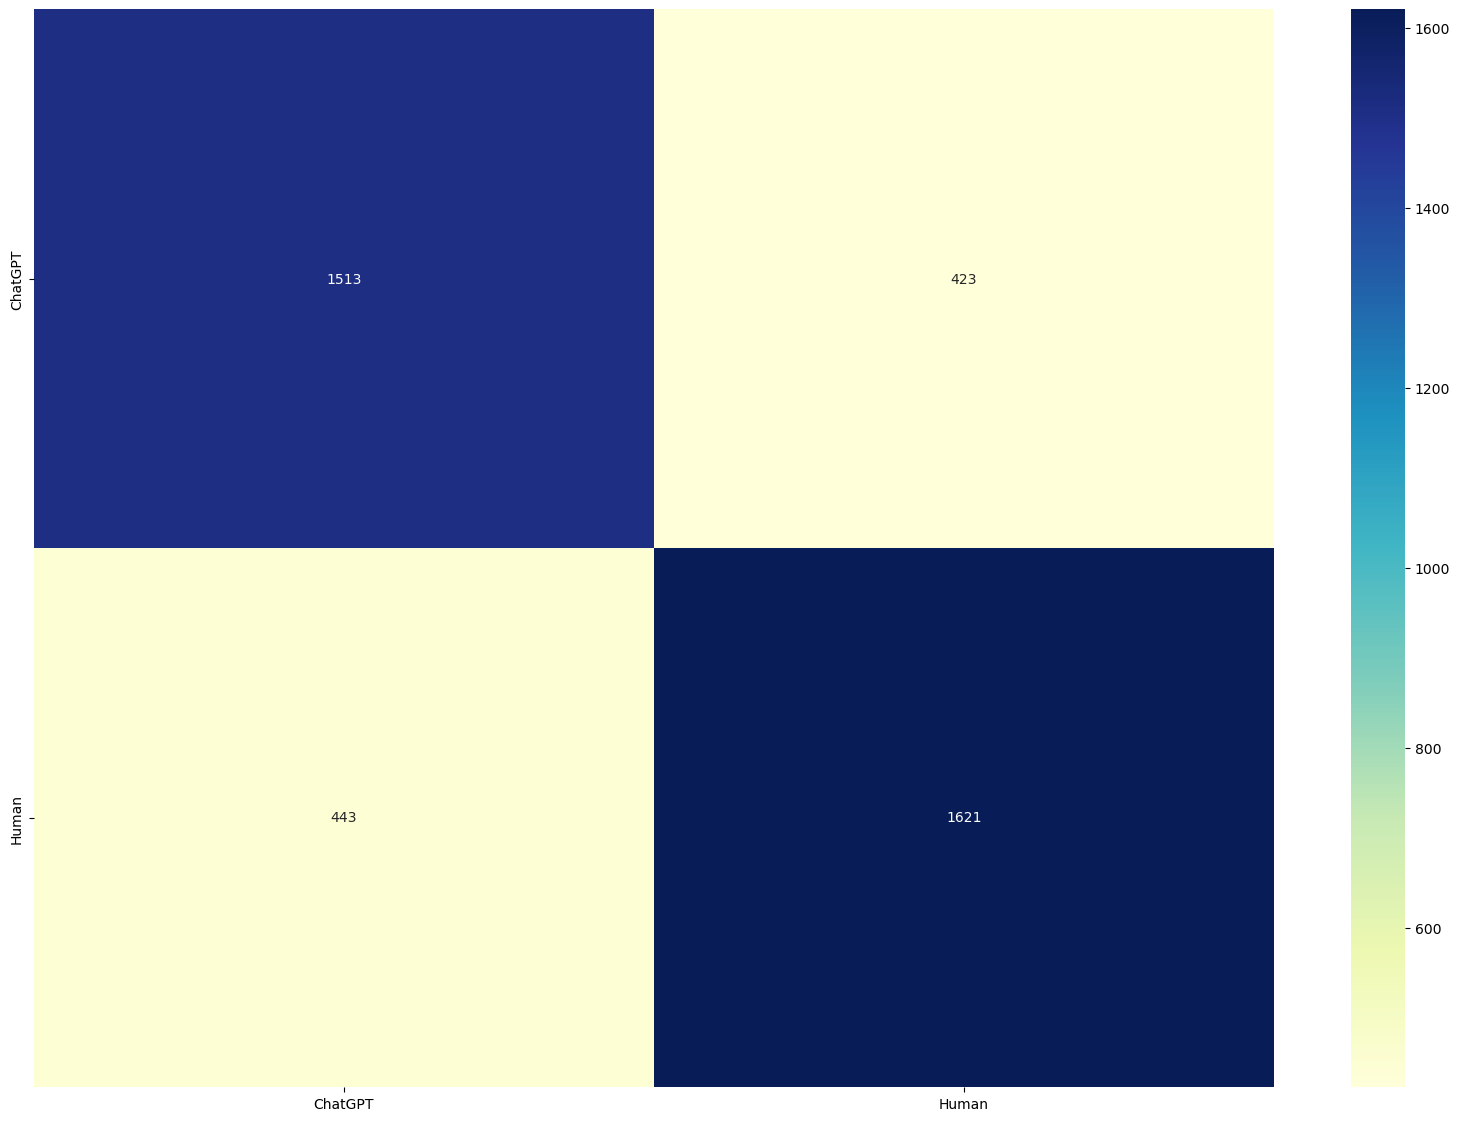

In [16]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (20,14))
sn.heatmap(confusion_matrix, annot=True,cmap="YlGnBu", fmt='g')

In [18]:
y_preddf=pd.DataFrame(y_pred)
y_preddf.rename(columns={0:'category predicted'},inplace=True)
y_preddf

,category predicted
0,human
1,human
2,chatgpt
3,chatgpt
4,chatgpt
...,...
3995,human
3996,human
3997,chatgpt
3998,human


Joining The DataFrames To Compare Actual And Predicted Values

In [19]:
x_testdf=pd.DataFrame(X_test)
y_testdf=pd.DataFrame(y_test)
x_testdf['id'] = range(1, len(x_testdf) + 1)
y_testdf['id'] = range(1, len(y_testdf) + 1)
y_preddf['id'] = range(1, len(y_preddf) + 1)
join1=y_testdf.merge(x_testdf, how = 'inner' ,indicator=False)
join_df=join1.merge(y_preddf, how = 'inner' ,indicator=False)
join_df[20:30]

,category,id,text,category predicted
20,human,21,"It would be easy to tell another tale, the rea...",human
21,human,22,Members of the Percy Family have a family vaul...,chatgpt
22,human,23,How do I identify adulterated milk?,human
23,chatgpt,24,Are hair integration systems or hair systems f...,human
24,human,25,How do you get started using Mathematica?,human
25,human,26,Chopin also endowed popular dance forms with a...,human
26,human,27,Chamath Palihapitiya: How do you manage ego an...,human
27,human,28,businessman dismissed ‘false reports’ of his d...,chatgpt
28,chatgpt,29,What causes the variation in the taste of Coca...,chatgpt
29,human,30,He was rushed to hospital but was found dead o...,human


In [25]:
accuracy_score=metrics.accuracy_score(y_pred,y_test)*100
accuracy_score

78.35

The Accuracy Of the Predictions Is 78.35%